<h2 align=center> Odia Character Recognition</h2>

### Task 1: Import Libraries

In [2]:
cd /kaggle/input

/kaggle/input


In [3]:
ls

NITROHCS_V1.0/


In [4]:
pip install livelossplot==0.5.2

     |████████████████████████████████| 496 kB 6.0 MB/s eta 0:00:01
  Created wheel for tornado: filename=tornado-6.0.4-cp37-cp37m-linux_x86_64.whl size=428636 sha256=764fc1e9eaef100fb417ea58ff72e3ff6feffa82af0275214376d63ad7ce4583
  Stored in directory: /root/.cache/pip/wheels/7d/14/fa/d88fb5da77d813ea0ffca38a2ab2a052874e9e1142bad0b348
Successfully built tornado
ERROR: jupyterlab-git 0.10.0 has requirement nbdime<2.0.0,>=1.1.0, but you'll have nbdime 2.0.0 which is incompatible.
  Attempting uninstall: tornado
    Found existing installation: tornado 5.0.2
    Uninstalling tornado-5.0.2:
      Successfully uninstalled tornado-5.0.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow.keras as keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.2.0


### Task 2: Plot Sample Images

In [6]:
for expression in os.listdir("NITROHCS_V1.0/"):
    print(str(len(os.listdir("NITROHCS_V1.0/" + expression))) + " " + expression + " images")

320 NITROHCS-013 images
320 NITROHCS-027 images
320 NITROHCS-005 images
320 NITROHCS-004 images
320 NITROHCS-036 images
320 NITROHCS-020 images
320 NITROHCS-021 images
320 NITROHCS-038 images
320 NITROHCS-015 images
320 NITROHCS-043 images
320 NITROHCS-031 images
320 NITROHCS-030 images
320 NITROHCS-045 images
320 NITROHCS-023 images
320 NITROHCS-042 images
320 NITROHCS-009 images
320 NITROHCS-012 images
320 NITROHCS-026 images
320 NITROHCS-033 images
320 NITROHCS-029 images
320 NITROHCS-008 images
320 NITROHCS-022 images
320 NITROHCS-011 images
320 NITROHCS-046 images
320 NITROHCS-010 images
320 NITROHCS-025 images
320 NITROHCS-041 images
320 NITROHCS-014 images
320 NITROHCS-016 images
320 NITROHCS-017 images
320 NITROHCS-035 images
320 NITROHCS-001 images
320 NITROHCS-002 images
320 NITROHCS-007 images
320 NITROHCS-044 images
320 NITROHCS-034 images
320 NITROHCS-039 images
320 NITROHCS-028 images
320 NITROHCS-047 images
320 NITROHCS-040 images
320 NITROHCS-003 images
320 NITROHCS-018

### Task 3: Generate Training and Validation Batches

In [7]:
img_size = 48
batch_size = 64

datagen = ImageDataGenerator(zoom_range = 0.2, rescale=1./255, validation_split = 0.3)
#ImageDataGenerator accepts the original data, randomly transforms it, and returns only the new, transformed data
#Translations, Rotations, Changes in scale, Shearing, Horizontal (and in some cases, vertical) flips

train_generator = datagen.flow_from_directory("NITROHCS_V1.0/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen.flow_from_directory("NITROHCS_V1.0//",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                              subset='validation',
                                                    shuffle=True)

Found 10528 images belonging to 47 classes.
Found 4512 images belonging to 47 classes.


In [8]:
'''train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)'''

"train_datagen = ImageDataGenerator(rescale=1./255,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    validation_split=0.2) # set validation split\n\ntrain_generator = train_datagen.flow_from_directory(\n    train_data_dir,\n    target_size=(img_height, img_width),\n    batch_size=batch_size,\n    class_mode='binary',\n    subset='training') # set as training data\n\nvalidation_generator = train_datagen.flow_from_directory(\n    train_data_dir, # same directory as training data\n    target_size=(img_height, img_width),\n    batch_size=batch_size,\n    class_mode='binary',\n    subset='validation') # set as validation data\n\nmodel.fit_generator(\n    train_generator,\n    steps_per_epoch = train_generator.samples // batch_size,\n    validation_data = validation_generator, \n    validation_steps = validation_generator.samples // batch_size,\n    epochs = nb_epochs)"

### Task 4: Create CNN Model

In [9]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(47, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

### Task 6: Train and Evaluate Model

In [10]:
'''steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=validation_steps)'''

'steps_per_epoch = train_generator.n//train_generator.batch_size\nvalidation_steps = validation_generator.n//validation_generator.batch_size\nmodel.fit(\n        train_generator,\n        steps_per_epoch=steps_per_epoch,\n        epochs=20,\n        validation_data=validation_generator,\n        validation_steps=validation_steps)'

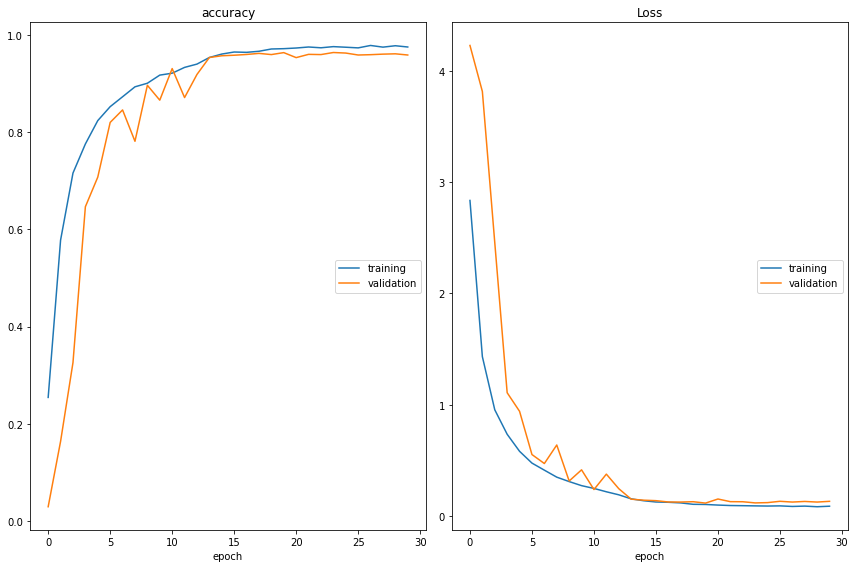

accuracy
	training         	 (min:    0.254, max:    0.978, cur:    0.975)
	validation       	 (min:    0.029, max:    0.964, cur:    0.958)
Loss
	training         	 (min:    0.083, max:    2.836, cur:    0.088)
	validation       	 (min:    0.116, max:    4.229, cur:    0.131)

Epoch 00030: saving model to odia_weights.h5
164/164 [==============================] - 19s 117ms/step - loss: 0.0876 - accuracy: 0.9750 - val_loss: 0.1315 - val_accuracy: 0.9585 - lr: 1.0000e-05
CPU times: user 7min 44s, sys: 49.2 s, total: 8min 34s
Wall time: 9min 21s


In [11]:
%%time

epochs = 30
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("odia_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [12]:
cd /kaggle/working/

/kaggle/working


### Task 7: Represent Model as JSON String

In [13]:
model_json = model.to_json()
with open("odia1.json", "w") as json_file:
    json_file.write(model_json)